In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
df= pd.read_csv("gender_voice_dataset.csv")

In [5]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

<AxesSubplot:>

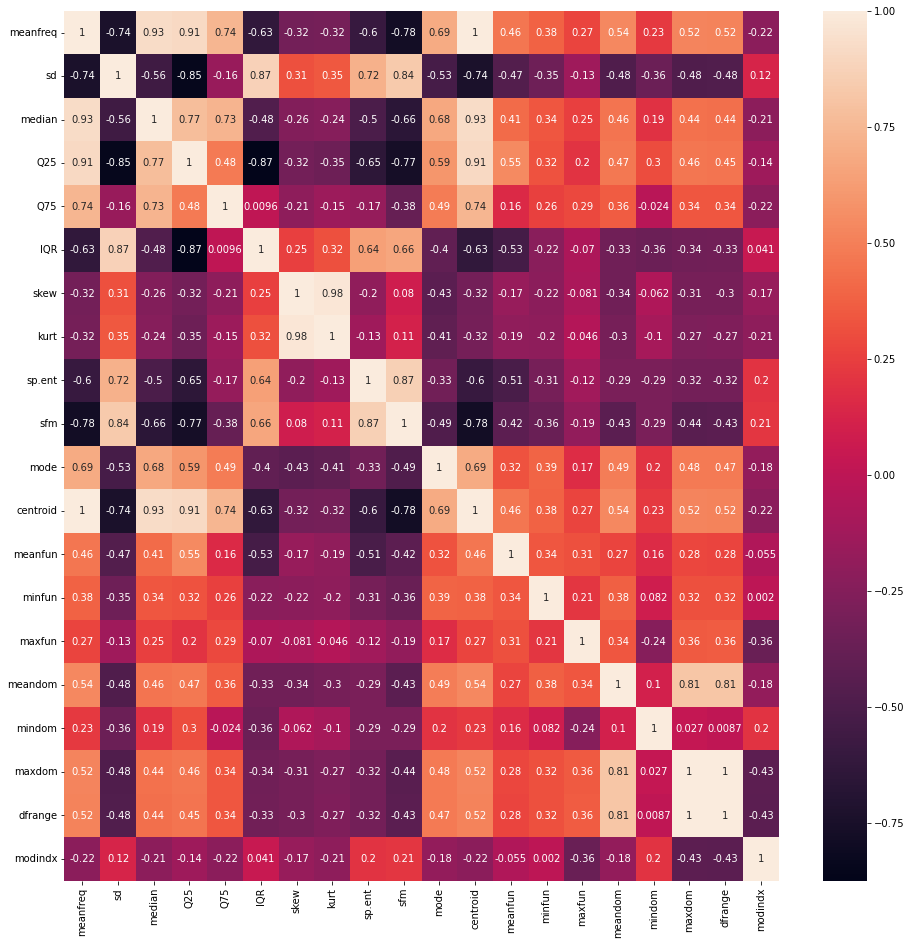

In [8]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot= True)

C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


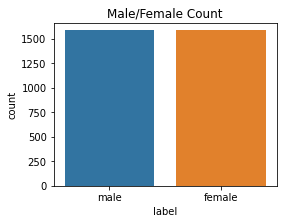

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(df['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

In [10]:
df = df.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [11]:
df.head(2)

sd    median       Q25       Q75       IQR       skew    sp.ent  \
0  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462  0.893369   
1  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285  0.892193   

   mode  centroid   meanfun    minfun    maxfun    mindom    maxdom   modindx  \
0   0.0  0.059781  0.084279  0.015702  0.275862  0.007812  0.007812  0.000000   
1   0.0  0.066009  0.107937  0.015826  0.250000  0.007812  0.054688  0.052632   

  label  
0  male  
1  male

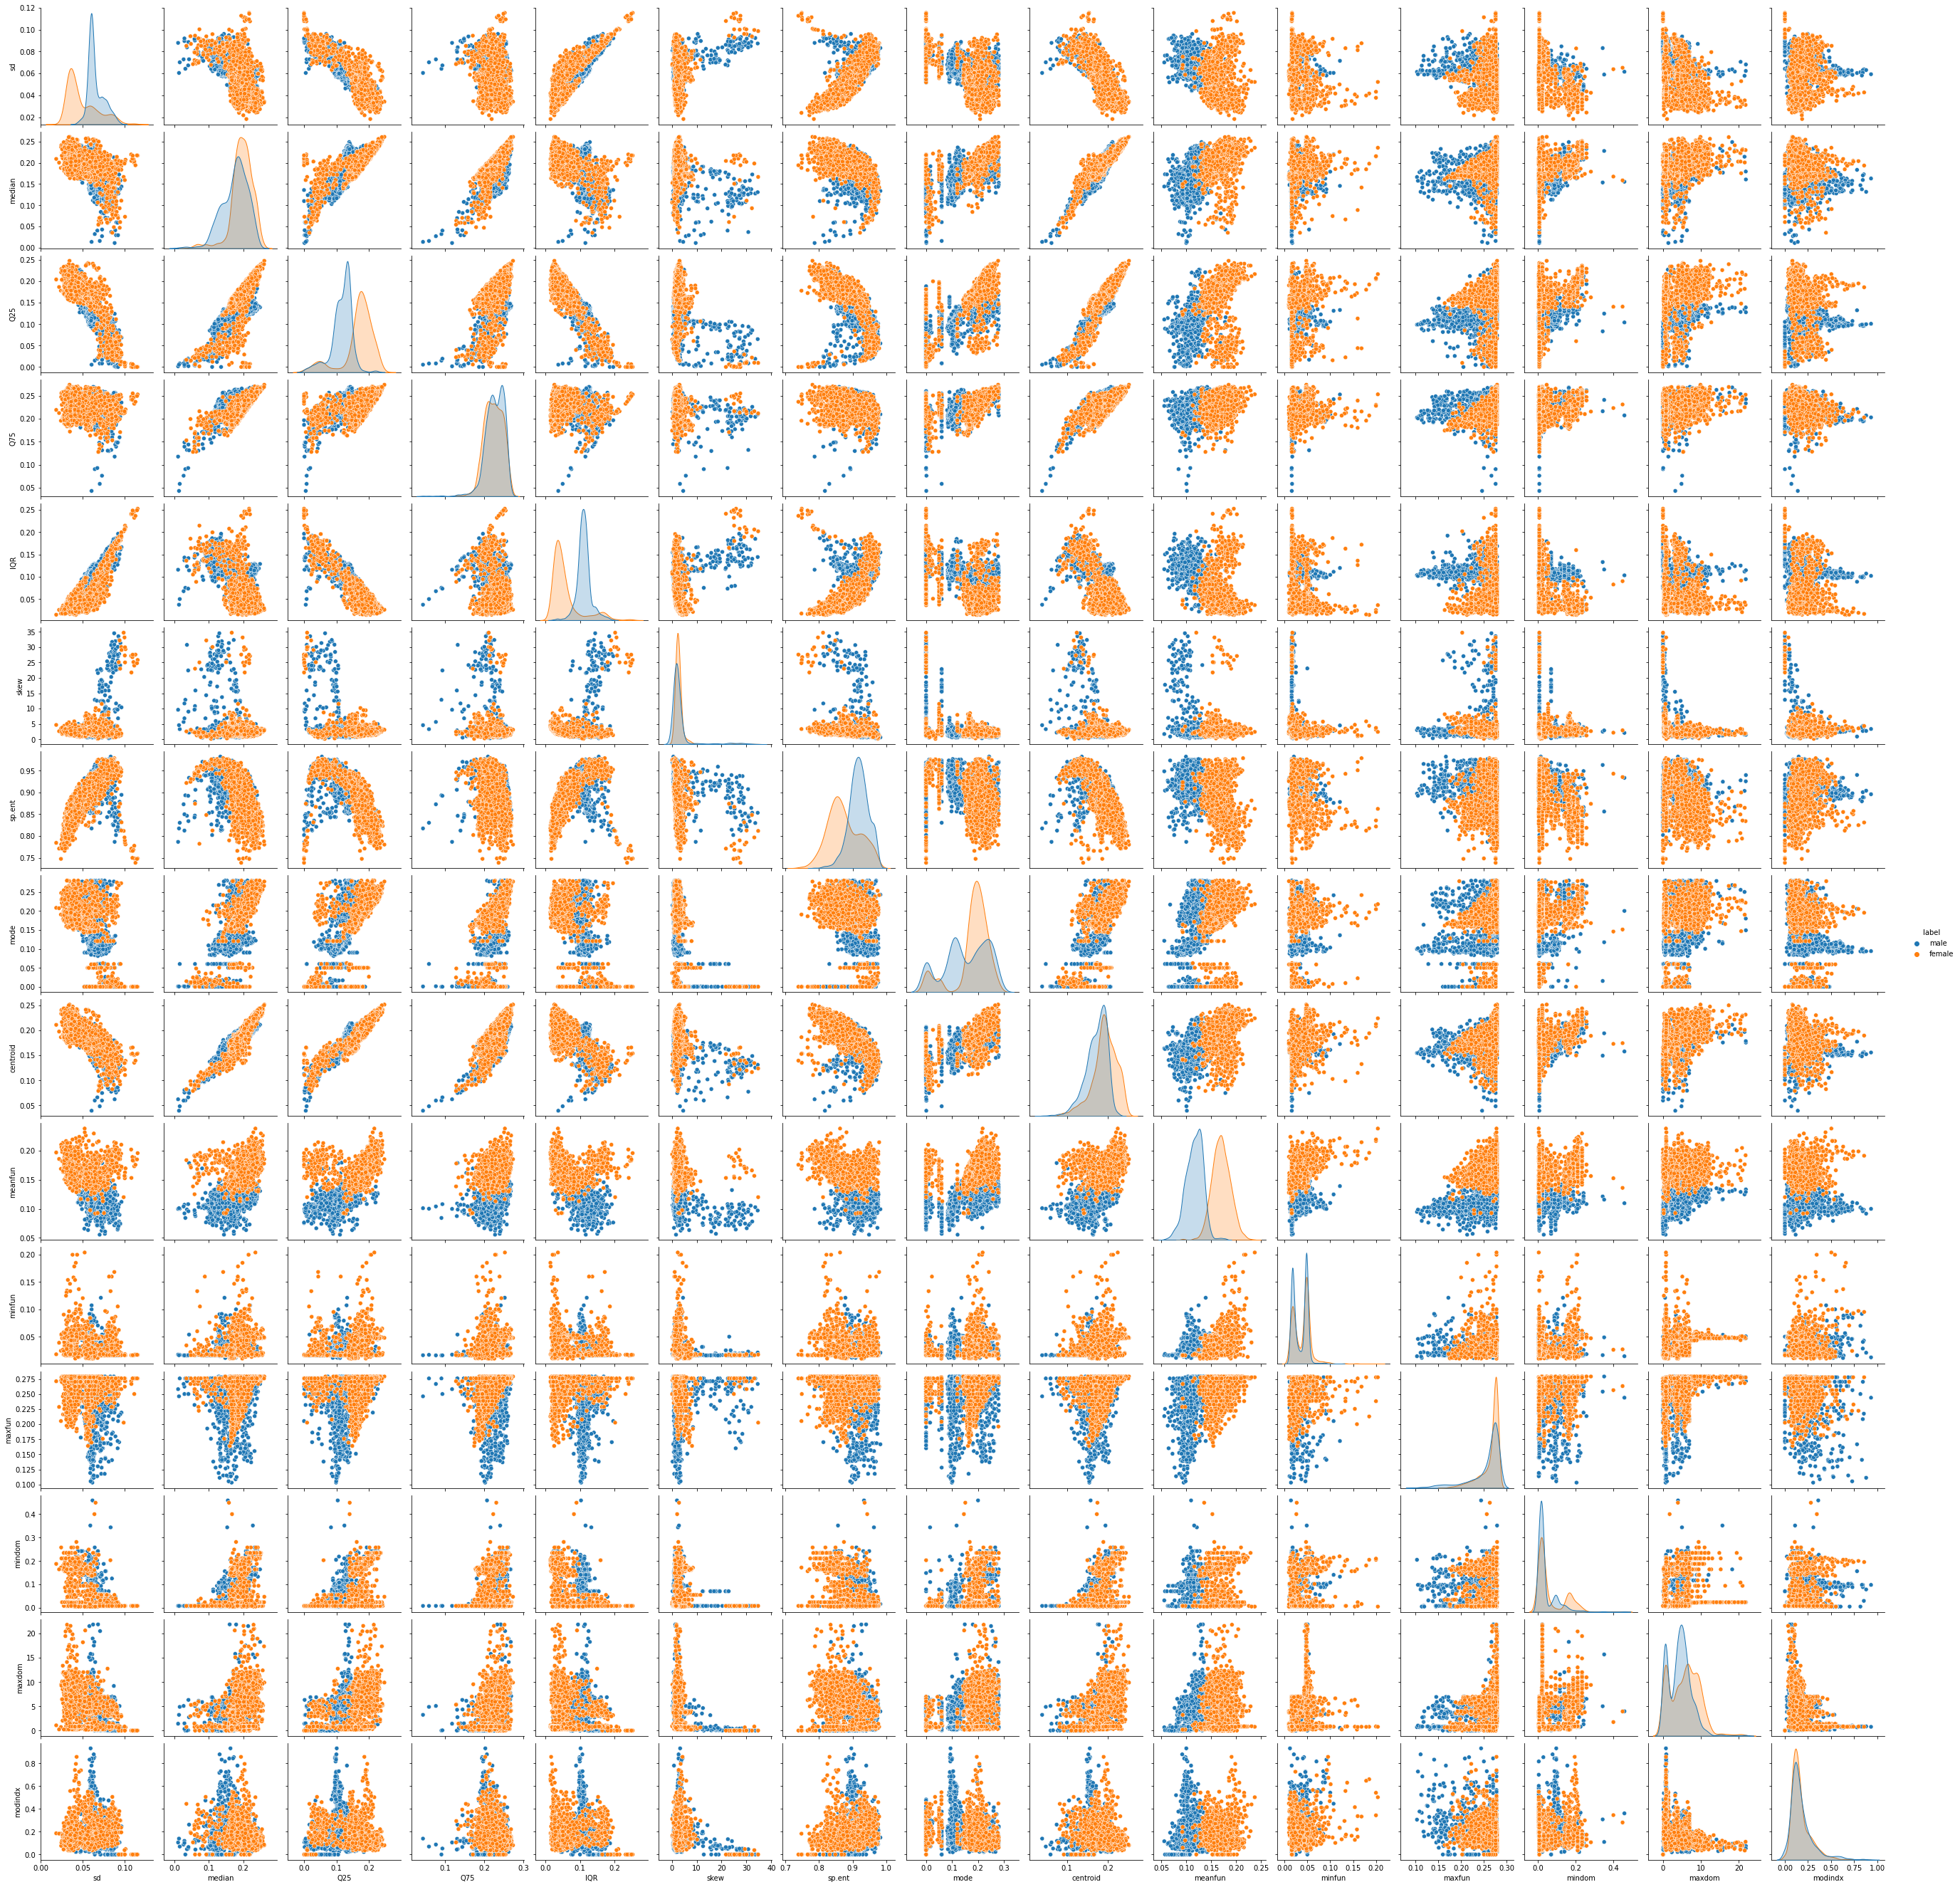

In [13]:
sns.pairplot(df, hue="label")

In [14]:
y = df['label']
X = df.drop(['label'], axis = 1)

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [16]:
svm = SVC().fit(Xtrain, ytrain)
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Accuracy on training set: 0.71
Accuracy on test set: 0.72


In [17]:
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(Xtrain, ytrain)
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 1.00
Accuracy on test set: 0.98
